In [47]:
import os
import numpy as np
import pandas as pd
import h5py
import pickle as pkl
from pathlib import Path
from scipy.stats import gaussian_kde
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
feats = pd.read_csv('../local/ExportPCS.csv')

In [36]:
data = feats[feats['did'] == 1]
data.shape

(14242, 12)

In [48]:
sc = StandardScaler()
pca = PCA(n_components=2)
x = sc.fit_transform(data.iloc[:, :-2])
data_2d = pca.fit_transform(x)

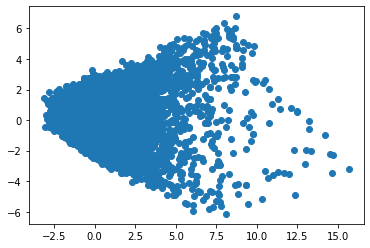

In [49]:
plt.scatter(data_2d[:, 0], data_2d[:, 1])

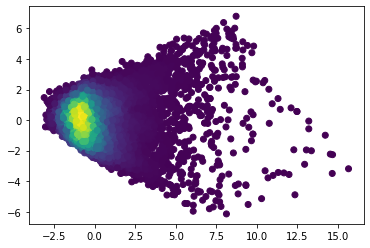

In [50]:
x, y = data_2d.T
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)
plt.scatter(x, y, c=z)

/home/thanos/.envs/aug/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

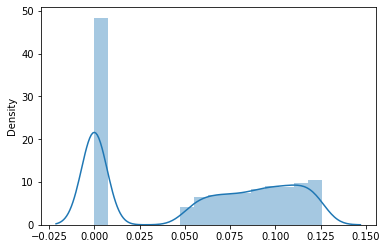

In [74]:
mm = MinMaxScaler()
# z2 = mm.fit_transform(z.reshape(-1, 1)).flatten()
z2 = np.where(z - 0.05 > 0, z, 0)

sns.distplot(z2)

In [88]:
(z / z.sum()).sum()

1.0

In [78]:
np.random.seed(1)

keep = (np.random.random(len(z2)) / 10) > z2
# keep = z2 > 0.2

keep.sum(), len(keep) - keep.sum()

(6640, 7602)

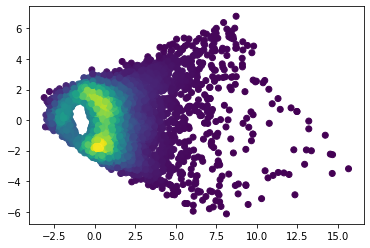

In [79]:
x_kept = x[keep]
y_kept = y[keep]
xy = np.vstack([x_kept, y_kept])
z_kept = gaussian_kde(xy)(xy)
plt.scatter(x_kept, y_kept, c=z_kept)

In [83]:
ids = data.loc[keep, 'id']

In [84]:
ids

1            2.0
2            3.0
3            4.0
5           38.0
13          46.0
          ...   
14236    22992.0
14237    22993.0
14238    22995.0
14240    22997.0
14241    22999.0
Name: id, Length: 6640, dtype: float64

In [95]:
def visualize(data):
    sc = StandardScaler()
    pca = PCA(n_components=2)
    x = sc.fit_transform(data)
    data_2d = pca.fit_transform(x)
    
    x, y = data_2d.T
    xy = np.vstack([x, y])
    z = gaussian_kde(xy)(xy)
    
    plt.scatter(x, y, c=z)

In [92]:
def remove_1_percent(data):
    
    sc = StandardScaler()
    pca = PCA(n_components=2)
    
    x = sc.fit_transform(data)
    data_2d = pca.fit_transform(x)
    
    x, y = data_2d.T
    xy = np.vstack([x, y])
    z = gaussian_kde(xy)(xy)

    throw_ind = np.random.choice(np.arange(len(z)), size=len(z)//100, p=z/z.sum())
    
    keep = np.array([True] * len(z))
    keep[throw_ind] = False
    
    return data[keep], throw_ind

In [122]:
def remove_n(data, n):
    
    sc = StandardScaler()
    pca = PCA(n_components=2)
    
    x = sc.fit_transform(data)
    data_2d = pca.fit_transform(x)
    
    x, y = data_2d.T
    xy = np.vstack([x, y])
    z = gaussian_kde(xy)(xy)

    throw_ind = np.random.choice(np.arange(len(z)), size=n, p=z/z.sum())

    keep = np.array([True] * len(z))
    keep[throw_ind] = False
    
    return data.iloc[keep], throw_ind

(14242, 10) (14102, 10)


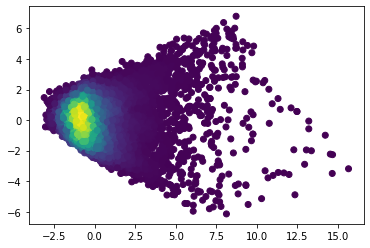

In [102]:
original = data.iloc[:, :-2]
visualize(original)

kept = remove_1_percent(original)

print(original.shape, kept.shape)

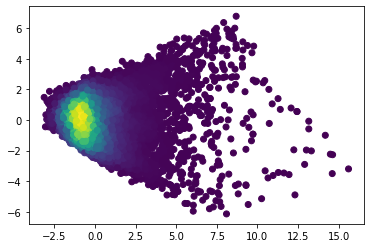

In [99]:
visualize(kept)

Iteration 0: 13947 - 14242
Iteration 1: 13647 - 13947
Iteration 2: 13349 - 13647
Iteration 3: 13056 - 13349
Iteration 4: 12759 - 13056
Iteration 5: 12466 - 12759
Iteration 6: 12172 - 12466
Iteration 7: 11877 - 12172
Iteration 8: 11583 - 11877
Iteration 9: 11288 - 11583
Iteration 10: 10995 - 11288
Iteration 11: 10701 - 10995
Iteration 12: 10409 - 10701
Iteration 13: 10120 - 10409
Iteration 14: 9825 - 10120
Iteration 15: 9532 - 9825
Iteration 16: 9246 - 9532
Iteration 17: 8949 - 9246
Iteration 18: 8657 - 8949
Iteration 19: 8363 - 8657


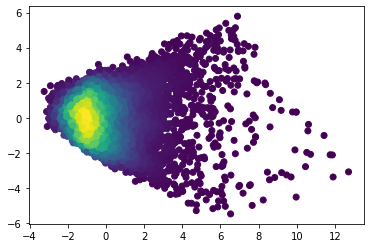

In [123]:
kept_ = original.copy()
thrown = []

for i in range(20):
    b = len(kept_)
    kept_, t = remove_n(kept_, n=300)
    thrown.append(t)
    print('Iteration {}: {} - {}'.format(i, len(kept_), b))
    
visualize(kept_)

In [124]:
for i in range(20, 30):
    b = len(kept_)
    kept_, t = remove_n(kept_, n=300)
    thrown.append(t)
    print('Iteration {}: {} - {}'.format(i, len(kept_), b))

Iteration 20: 8074 - 8363
Iteration 21: 7781 - 8074
Iteration 22: 7489 - 7781
Iteration 23: 7194 - 7489
Iteration 24: 6900 - 7194
Iteration 25: 6605 - 6900
Iteration 26: 6315 - 6605
Iteration 27: 6019 - 6315
Iteration 28: 5729 - 6019
Iteration 29: 5440 - 5729


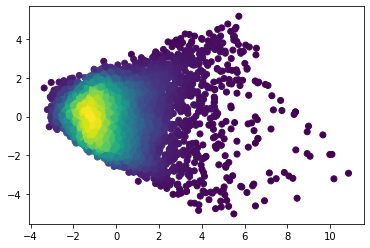

In [125]:
visualize(kept_)

In [126]:
for i in range(30, 35):
    b = len(kept_)
    kept_, t = remove_n(kept_, n=300)
    thrown.append(t)
    print('Iteration {}: {} - {}'.format(i, len(kept_), b))


Iteration 30: 5150 - 5440
Iteration 31: 4861 - 5150
Iteration 32: 4571 - 4861
Iteration 33: 4278 - 4571
Iteration 34: 3988 - 4278


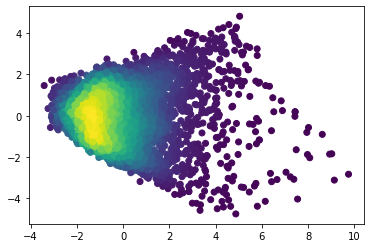

In [127]:
visualize(kept_)

In [174]:
us_ids = data.loc[kept_.index]['id']

In [145]:
ts_orig = pd.read_csv('../data/Yearly-train.csv').drop(columns='V1')

In [136]:
import sys

sys.path.append('..')

import datasets

In [167]:
from tqdm import tqdm

In [176]:
D = []

for s in tqdm(ts_orig.values):
    ser = pd.Series(s)
    ser = datasets.get_last_N(ser, 24)
    D.append(ser)

100%|██████████| 23000/23000 [00:04<00:00, 4933.12it/s]


In [177]:
D = np.vstack(D)

sc = MinMaxScaler()
D = sc.fit_transform(D.T).T

In [184]:
D[us_ids.values.astype(int)]

array([[0.        , 0.03036876, 0.09327549, ..., 0.87418655, 0.95010846,
        1.        ],
       [0.        , 0.03108808, 0.06476684, ..., 0.79533679, 0.89637306,
        1.        ],
       [0.        , 0.03805021, 0.08718901, ..., 1.        , 0.99987335,
        0.93866093],
       ...,
       [0.        , 0.15595463, 0.13516068, ..., 0.75425331, 0.51984877,
        0.50126024],
       [0.        , 0.00910209, 0.02263223, ..., 0.80590406, 0.70209102,
        1.        ],
       [0.20502234, 0.20502234, 0.05184784, ..., 1.        , 0.66177068,
        0.38046568]])

In [196]:
D[:, :-6].shape, D[:, -6:].shape

((23000, 18), (23000, 6))

In [198]:
with h5py.File('../data/yearly_24_undersampled.h5', 'w') as hf:
    hf.create_dataset('X', data=D[:, :-6])
    hf.create_dataset('y', data=D[:, -6:])